In [228]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
#parse data 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
#label encoding on categorical data 

df = pd.read_csv('downloads/ee6d2f60cdafb550.csv')
df = df.dropna()
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df.FFI49_desc)
print(len(integer_encoded))
print(len(df.FFI49_desc))
df.FFI49_desc = integer_encoded
df.divyield_Median = [float(x.strip('%'))/100 for x in df.divyield_Median]

print(len(np.where(df.indret_vw > 0)[0]))
print(len(np.where(df.indret_vw < 0)[0]))


9297
9297
5410
3886


In [229]:
output = df.indret_vw
outputtwo = df.indret_ew
data = df.drop(columns = ['indret_ew','indret_vw','staff_sale_Median'])

In [177]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(data, output, test_size=0.20)

In [178]:
print(y_train.count())
print(y_test.count())

print(y_train.count()+y_test.count() + 2)
print(len(y_train)/len(y_train+y_test))

7437
1860
9299
0.7999354630525977


mse: 0.0041119290027890045
r2: 0.04939171061629399


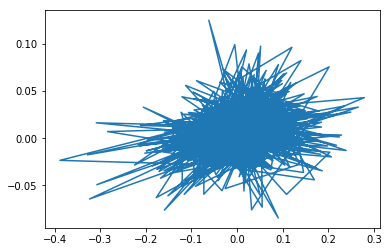

In [182]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.utils.fixes import signature
import matplotlib.pyplot as plt

reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)
reg.coef_

y_pred = reg.predict(x_test)
print("mse: " + str(mean_squared_error(y_test, y_pred)))
print("r2: " + str(sklearn.metrics.r2_score(y_test,y_pred)))


In [115]:
df.head()

,public_date,FFI49_desc,NFIRM,indret_ew,indret_vw,dpr_Median,PEG_trailing_Median,bm_Median,CAPEI_Median,divyield_Median,...,rect_turn_Median,sale_equity_Median,sale_invcap_Median,sale_nwc_Median,accrual_Median,rd_sale_Median,adv_sale_Median,staff_sale_Median,PEG_1yrforward_Median,PEG_ltgforward_Median
12337,19930831,25,6,0.052904,0.068678,0.460,4.556,0.438,21.835,0.0229,...,5.494,3.146,2.601,9.285,0.049,0.068,0.013,0.0,-0.333,1.572
12383,19930930,25,6,-0.035253,-0.046242,0.460,4.380,0.438,20.573,0.0245,...,5.494,3.146,2.601,9.285,0.056,0.042,0.013,0.0,-0.320,1.445
12430,19931031,25,6,0.009319,-0.018318,0.460,4.268,0.438,20.959,0.0251,...,5.685,3.027,2.484,9.285,0.056,0.042,0.013,0.0,-0.350,1.422
12477,19931130,25,5,-0.022123,-0.014000,0.479,3.865,0.401,19.861,0.0273,...,5.364,2.755,2.345,8.303,0.057,0.080,0.016,0.0,0.677,1.848
12524,19931231,25,5,0.096039,0.072342,0.479,4.122,0.401,21.179,0.0255,...,5.364,2.755,2.345,8.303,0.057,0.080,0.016,0.0,0.722,1.962


In [237]:
from sklearn.linear_model import LogisticRegression

#Binary classification-Logistic Regression
transformed_output = [1 if o >= 0 else -1 for o in output]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(data, transformed_output, test_size=0.20)

clf = LogisticRegression(random_state=40, solver='lbfgs').fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(y_train.count(1))
print(y_train.count(-1))

print(y_train.count(1)/(y_train.count(1)+y_train.count(-1)))

print(y_test.count(1))
print(y_test.count(-1))
print(y_test.count(1)/(y_test.count(1)+y_test.count(-1)))

print("mse: " + str(mean_squared_error(y_test, y_pred)))
print("r2: " + str(sklearn.metrics.r2_score(y_test,y_pred)))

unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))


4343
3094
0.5839720317332258
1068
792
0.5741935483870968
mse: 1.7032258064516128
r2: -0.7415730337078648


{1: 1860}

number of increasing1860


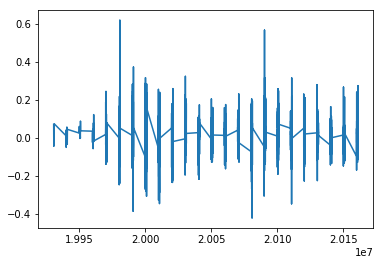

number of decreasing0
Average precision-recall score: 0.57


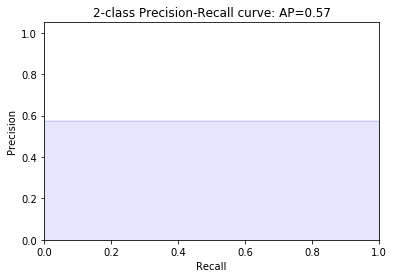

In [247]:
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.utils.fixes import signature
import matplotlib.pyplot as plt

print("number of increasing" + str(len(np.where(y_pred > 0)[0])))

plt.plot(df.public_date,output)
plt.show()

print("number of decreasing" + str(len(np.where(y_pred < 0)[0])))
      
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
precision, recall, _ = precision_recall_curve(y_test, y_pred)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.1,
         where='post')
plt.fill_between(recall, precision, alpha=0.1, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

In [121]:
dfsp = pd.read_csv('downloads/eafe6a287f1adb2b.csv')
outputsp = df.indret_ew
outputtwosp = df.indret_vw

In [125]:
df = pd.read_csv('downloads/ee6d2f60cdafb550.csv')
df.sort_values(by='public_date')


,public_date,FFI49_desc,NFIRM,indret_ew,indret_vw,dpr_Median,PEG_trailing_Median,bm_Median,CAPEI_Median,divyield_Median,...,rect_turn_Median,sale_equity_Median,sale_invcap_Median,sale_nwc_Median,accrual_Median,rd_sale_Median,adv_sale_Median,staff_sale_Median,PEG_1yrforward_Median,PEG_ltgforward_Median
0,19700131,AERO,8,-0.117325,-0.149955,0.000,1.356,0.696,8.490,4.76%,...,8.843,4.416,3.019,7.479,0.021,0.000,0.000,0.388,NaN,NaN
22,19700131,HSHLD,25,-0.070517,-0.068231,0.000,2.131,0.351,18.974,3.20%,...,7.856,2.443,2.057,3.981,0.002,0.000,0.000,0.000,NaN,NaN
23,19700131,LABEQ,1,-0.083478,-0.083478,0.000,8.505,0.191,44.643,NaN,...,5.992,1.585,1.580,2.582,-0.058,0.000,0.000,0.445,NaN,NaN
24,19700131,MACH,40,-0.038664,-0.071795,0.048,1.270,0.524,10.474,4.68%,...,5.539,2.145,1.697,3.062,0.003,0.000,0.000,0.000,NaN,NaN
25,19700131,MEALS,1,-0.326923,-0.326923,0.448,0.053,0.266,3.652,3.43%,...,13.913,2.512,1.757,7.331,0.028,0.000,0.000,0.000,NaN,NaN
26,19700131,MEDEQ,1,-0.007937,-0.007937,0.000,7.421,0.423,34.144,1.07%,...,4.370,2.041,1.355,1.788,0.044,0.000,0.000,0.000,NaN,NaN
27,19700131,MINES,7,-0.046483,-0.064723,0.000,0.348,0.463,12.518,5.73%,...,7.728,0.969,0.884,2.951,0.049,0.000,0.000,0.000,NaN,NaN
28,19700131,OIL,21,-0.122596,-0.128312,0.000,1.369,0.534,10.543,5.10%,...,5.704,1.080,0.824,5.185,0.059,0.000,0.000,0.115,NaN,NaN
30,19700131,RTAIL,27,-0.056199,-0.059770,0.000,2.129,0.673,13.637,3.57%,...,30.907,4.600,3.510,8.853,0.008,0.000,0.000,0.000,NaN,NaN
31,19700131,SHIPS,3,-0.050288,-0.056947,0.000,0.190,0.795,9.208,5.18%,...,5.147,3.072,2.410,4.715,-0.019,0.000,0.000,0.000,NaN,NaN


In [138]:
df.describe()

,public_date,FFI49_desc,NFIRM,indret_ew,indret_vw,dpr_Median,PEG_trailing_Median,bm_Median,CAPEI_Median,divyield_Median,...,rect_turn_Median,sale_equity_Median,sale_invcap_Median,sale_nwc_Median,accrual_Median,rd_sale_Median,adv_sale_Median,staff_sale_Median,PEG_1yrforward_Median,PEG_ltgforward_Median
count,9.297000e+03,9297.000000,9297.000000,9297.000000,9297.000000,9297.000000,9297.000000,9297.000000,9297.000000,9297.000000,...,9297.000000,9297.000000,9297.000000,9297.000000,9297.000000,9297.000000,9297.000000,9297.000000,9297.000000,9297.000000
mean,2.007194e+07,23.471335,10.972679,0.009234,0.007534,0.297157,1.545103,0.415523,26.186989,0.020137,...,9.456598,3.135245,1.498381,4.330559,0.045541,0.025095,0.012810,0.021220,0.861005,1.582644
std,5.475709e+04,13.741116,9.343437,0.072807,0.069027,0.239335,3.234654,0.234337,122.081473,0.011160,...,9.306404,22.033141,0.851351,744.316890,0.032211,0.041488,0.025287,0.072406,2.196791,1.381506
min,1.993083e+07,0.000000,1.000000,-0.388145,-0.423152,0.000000,-15.636000,0.001000,-581.790000,0.000310,...,0.088000,0.417000,0.242000,-40463.000000,-0.148000,0.000000,0.000000,0.000000,-38.728000,-26.774000
25%,2.003013e+07,11.000000,4.000000,-0.027703,-0.028132,0.149000,0.501000,0.253000,17.098000,0.012800,...,5.715000,1.428000,0.940000,4.412000,0.027000,0.000000,0.000000,0.000000,0.276000,1.186000
50%,2.007093e+07,24.000000,8.000000,0.010945,0.010136,0.276000,0.964000,0.354000,21.968000,0.018500,...,7.020000,2.277000,1.395000,7.853000,0.044000,0.004000,0.000000,0.000000,0.942000,1.527000
75%,2.012053e+07,35.000000,14.000000,0.046531,0.044499,0.403000,1.584000,0.516000,27.920000,0.024800,...,9.151000,3.060000,1.790000,14.972000,0.061000,0.031000,0.015000,0.000000,1.546000,1.944000
max,2.016123e+07,47.000000,42.000000,0.705826,0.617289,5.766000,67.843000,1.945000,7522.850000,0.131000,...,89.326000,1209.790000,7.614000,8210.620000,0.395000,0.202000,0.133000,0.386000,20.209000,19.583000


[1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1